####  To built a regression model using bioinformatics dataset. 

Find the aqueous solubility value of small molecules. The aqueous solubility value is a relative measure of the ability of a moledule to be soluble in water.

To become an effective drug, molecules will need to be uptake and distributed in the human body and such property is directly governed by the aqueous solubility

In [2]:
import pandas as pd
import numpy as np
delaney_df = pd.read_csv('delaney.csv')

In [8]:
delaney_df

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [4]:
delaney_descriptors_df = pd.read_csv('delaney_solubility_with_descriptors.csv')

In [7]:
delaney_descriptors_df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [9]:
X = delaney_descriptors_df.drop('logS', axis = 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [11]:
y = delaney_descriptors_df.logS

In [12]:
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 41 )

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
Linear_Reg = linear_model.LinearRegression()
Linear_Reg.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_train = Linear_Reg.predict(X_train)

In [23]:
print('Coefficients:', Linear_Reg.coef_)
print('Intercept:', Linear_Reg.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, y_pred_train))

Coefficients: [-0.7648407  -0.00627888  0.0017826  -0.46641539]
Intercept: 0.2743325891293602
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


In [24]:
y_pred_test = Linear_Reg.predict(X_test)

In [25]:
print('Coefficients:', Linear_Reg.coef_)
print('Intercept:', Linear_Reg.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred_test))

Coefficients: [-0.7648407  -0.00627888  0.0017826  -0.46641539]
Intercept: 0.2743325891293602
Mean squared error (MSE): 1.03
Coefficient of determination (R^2): 0.76


In [26]:
yintercept = '%.2f' % Linear_Reg.intercept_
LogP = '%.2f LogP' % Linear_Reg.coef_[0]
MW = '%.4f MW' % Linear_Reg.coef_[1]
RB = '%.4f RB' % Linear_Reg.coef_[2]
AP = '%.2f AP' % Linear_Reg.coef_[3]

In [27]:
print('LogS = ' + 
      ' ' + 
      yintercept + 
      ' ' + 
      LogP + 
      ' ' + 
      MW + 
      ' + ' + 
      RB + 
      ' ' + 
      AP)

LogS =  0.27 -0.76 LogP -0.0063 MW + 0.0018 RB -0.47 AP


In [28]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Experimental LogS')

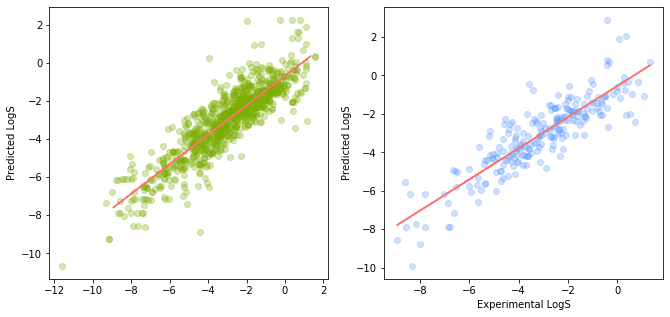

In [42]:
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
plt.scatter(x = y_train, y=y_pred_train, c = "#7CAE00", alpha = 0.3)
z = np.polyfit(y_train, y_pred_train,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D" )
plt.ylabel('Predicted LogS')


plt.subplot(1,2,2)
plt.scatter(x = y_test,y = y_pred_test, c = "#619CFF", alpha = 0.3)
z = np.polyfit(y_test, y_pred_test,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D" )
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')